In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

##### 1. Откроем файл HR.csv и выгрузим его в датасет

In [2]:
hr = pd.read_csv('HR.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Признаки:

1.satisfaction_level​ - Уровень удовлетворенности работой

2.Last_evaluation ​- Время с момента последней оценки в годах

3.number_projects​ - Количество проектов, выполненных за время работы

4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц

5.time_spend_company​ - Стаж работы в компании в годах

6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником

7.left​ - уволился ли сотрудник

8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет

9.department ​- отдел в котором работает сотрудник

10.salary​ - относительный уровень зарплаты

##### 2. Рассчитаем основные статистики для переменных

In [3]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Выведем моду по каждому показателю:

In [4]:
print(hr.satisfaction_level.mode()[0], hr.last_evaluation.mode()[0], hr.number_project.mode()[0],
      hr.average_montly_hours.mode()[0], hr.time_spend_company.mode()[0], hr.Work_accident.mode()[0],
      hr.left.mode()[0],hr.promotion_last_5years.mode()[0])

0.1 0.55 4 135 3 0 0 0


##### 3. Рассчитаем и визуализируем корреляционную матрицу. Выберем количественные переменные для этого

In [5]:
hr2 = hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
hr2.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


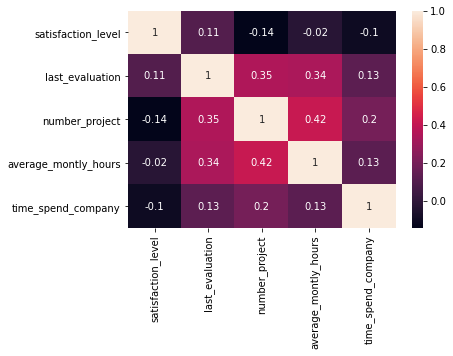

In [6]:
# sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.heatmap(hr2.corr(), annot=True)

Из визуализации и матрицы видим, что две наименее скоррелированные переменные - average_montly_hours к satisfaction_level, т.е. среднее количество часов на рабочем месте в месяц к уровню удовлетворенности работой. Наиболее скореллированные переменные - number_project к average_montly_hours, т.е. количество проектов, выполненных за время работы к среднему количеству часов на рабочем месте.

##### 4. Расчитаем количество сотрудников, работающих в каждом департаменте. 

In [7]:
#Для начала посмотрим, для наглядности, какие департаменты вообще присутствуют в датафрейме
hr.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

Выведем количество в каждом департаменте.

Видим, что большая часть сотрудников работала в отделах sales, technical, support.

In [10]:
hr['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [11]:
dist = round(hr['department'].value_counts()*100/sum(hr['department'].value_counts()))
print(f'\nРаспределение доли сотрудников по департаментам в процентном соотношении:\n{dist}')


Распределение доли сотрудников по департаментам в процентном соотношении:
sales          28.0
technical      18.0
support        15.0
IT              8.0
product_mng     6.0
marketing       6.0
RandD           5.0
accounting      5.0
hr              5.0
management      4.0
Name: department, dtype: float64


##### 5. Посмотрим распределение сотрудников по зарплатам.

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Распределение доли сотрудников с уровнем заработной платы в процентном соотношении:
 low       49.0
medium    43.0
high       8.0
Name: salary, dtype: float64


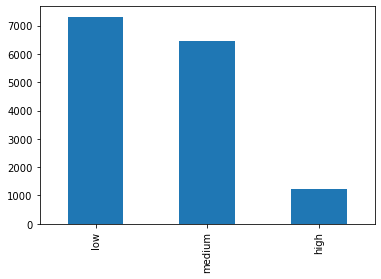

In [8]:
print(hr['salary'].value_counts())
print('\nРаспределение доли сотрудников с уровнем заработной платы в процентном соотношении:\n'
      , round(hr['salary'].value_counts()*100/sum(hr['salary'].value_counts())))
pic = hr['salary'].value_counts()
pic.plot.bar()

Большая часть сотрудников имела низкий и средний уровни зарплаты - 92% в сумме, с высоким уровнем дохода всего лишь 8%.

###### 6. Посмотрим распределение уровня зарплаты по департаментам.

In [9]:
distribution = hr[['department', 'salary', 'satisfaction_level']]
distribution = distribution.groupby(['department', 'salary']).count()
distribution

satisfaction_level
department  salary                    
IT          high                    83
            low                    609
            medium                 535
RandD       high                    51
            low                    364
            medium                 372
accounting  high                    74
            low                    358
            medium                 335
hr          high                    45
            low                    335
            medium                 359
management  high                   225
            low                    180
            medium                 225
marketing   high                    80
            low                    402
            medium                 376
product_mng high                    68
            low                    451
            medium                 383
sales       high                   269
            low                   2099
            medium                1772
support     high                   141
            low                   1146
            medium                 942
technical   high                   201
            low                   1372
            medium                1147

Для наглядности визуализируем данный датафрейм

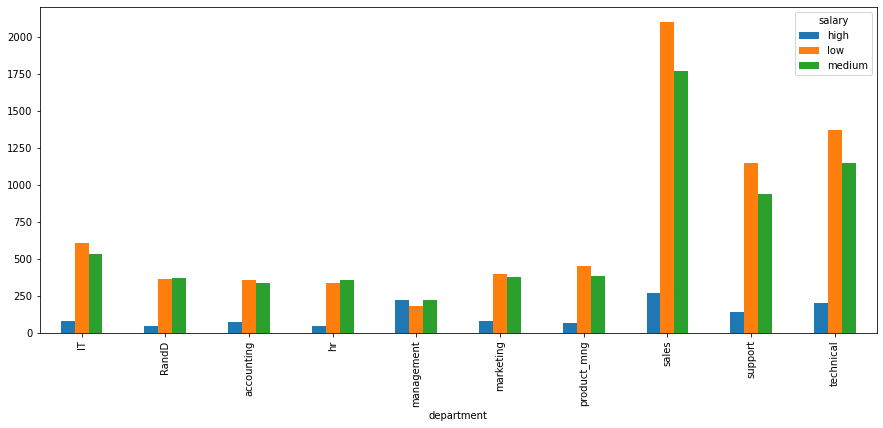

In [168]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,6

dist_table = hr[['department', 'salary', 'satisfaction_level']]
dist_table = dist_table.pivot_table('satisfaction_level', 
                                    index = 'department', columns = 'salary', aggfunc = 'count')
dist_table.plot.bar()

Все, за исключением management, показывают, что сотрудники низким и средним с уровнем зп преобладают над высоким уровнем зп. В management же высокий и средний уровень зп выше, чем низкий уровень и находятся примерно на одном же уровне.

##### 7. Проверим, возможно, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом и выведем результат на график

Text(0.5, 1.0, 'Уровень рабочих часов в месяц по сотрудникам с разным уровнем дохода')

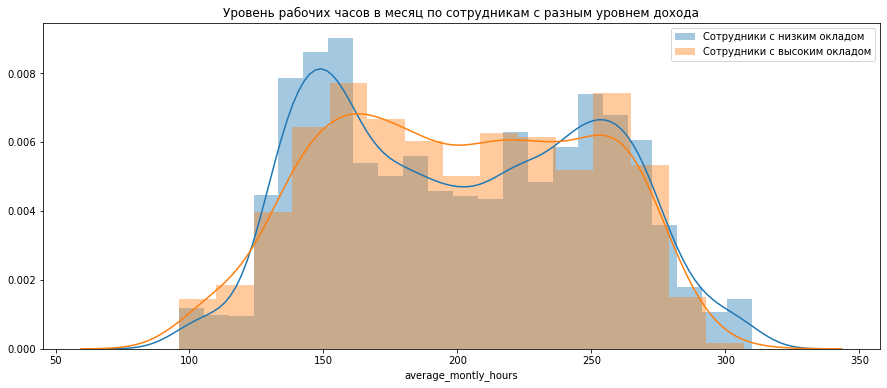

In [14]:
high = hr[hr['salary'] == 'high']['average_montly_hours']
low = hr[hr['salary'] == 'low']['average_montly_hours']
sns.distplot(low) 
sns.distplot(high)
plt.legend(['Сотрудники с низким окладом', 'Сотрудники с высоким окладом'])
plt.title('Уровень рабочих часов в месяц по сотрудникам с разным уровнем дохода')

In [15]:
from scipy  import stats
%matplotlib inline
stats.ttest_ind(high, low)

Ttest_indResult(statistic=-0.7288680398062308, pvalue=0.4661023478267259)

Мы видим, что существенной разницы в количестве отработанных часов у сотрудников с низким и высоким окладом не наблюдается. Следовательно данную гипотезу мы опровергаем.

##### 8. Рассчитаем следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности): ●Доля сотрудников с повышением за последние 5 лет ●Средняя степень удовлетворенности ●Среднее количество проектов

In [19]:
hr_filt = hr[['left', 'promotion_last_5years', 'satisfaction_level', 'number_project']]
hr_filt

,left,promotion_last_5years,satisfaction_level,number_project
0,1,0,0.38,2
1,1,0,0.80,5
2,1,0,0.11,7
3,1,0,0.72,5
4,1,0,0.37,2
...,...,...,...,...
14994,1,0,0.40,2
14995,1,0,0.37,2
14996,1,0,0.37,2
14997,1,0,0.11,6


In [20]:
hr_filt_left = hr_filt[(hr_filt['left'] == 1)]
hr_filt_left.groupby('promotion_last_5years').count().reset_index()
# hr_filt_left = hr_filt_left[['promotion_last_5years', 'left']]

,promotion_last_5years,left,satisfaction_level,number_project
0,0,3552,3552,3552
1,1,19,19,19


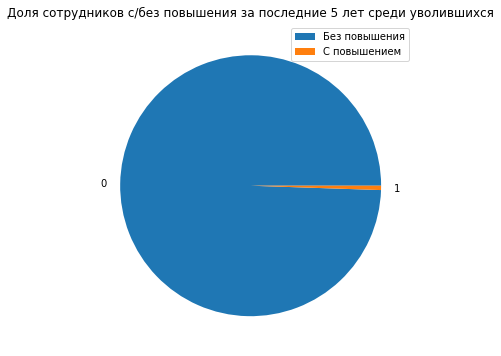

In [94]:
diag_left = hr_filt_left.promotion_last_5years.value_counts()
diag_left.plot(kind='pie',
                  title='Доля сотрудников с/без повышения за последние 5 лет среди уволившихся',
                  ylabel = '').legend(['Без повышения','С повышением'])

На круговой диаграмме видно, что среди уволившихся сотрудников доля без повышения значительно преобладает над теми, кто был с повышением. 

Посмотрим теперь на тех, кто не уволился.

In [21]:
hr_filt_noleft = hr_filt[(hr_filt['left'] == 0)]
hr_filt_noleft.groupby('promotion_last_5years').count().reset_index()

,promotion_last_5years,left,satisfaction_level,number_project
0,0,11128,11128,11128
1,1,300,300,300


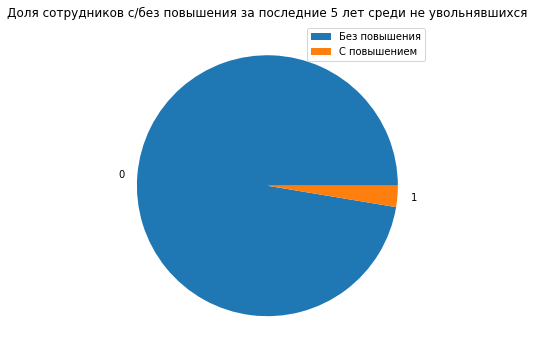

In [96]:
diag_noleft = hr_filt_noleft.promotion_last_5years.value_counts()
diag_noleft.plot(kind='pie',
                  title='Доля сотрудников с/без повышения за последние 5 лет среди не увольнявшихся',
                  ylabel = '').legend(['Без повышения','С повышением'])

In [35]:
"""
можно посчитать в доли по данным в % соотношении (97 и 3%)
"""

# prom_no = hr_filt_noleft[(hr_filt_noleft['promotion_last_5years'] == 0)]
# prom_yes = hr_filt_noleft[(hr_filt_noleft['promotion_last_5years'] == 1)]
# prom_no
# print(round(prom_yes.count()*100 / (prom_yes.count() + prom_no.count())))
# print(round(prom_no.count()*100 / (prom_no.count() + prom_yes.count())))

'\nможно посчитать в доли по данным в % соотношении (97 и 3%)\n'

Доля сотрудников из тех, кто не уволился чуть больше, чем в предыдущем сравнении.

Продолжим сравнение со средней степенью удовлетворенности и средним количеством проектов

In [104]:
hr_filt.groupby(['left']).agg({'satisfaction_level': 'mean', 'number_project': 'mean'}).reset_index()

,left,satisfaction_level,number_project
0,0,0.666810,3.786664
1,1,0.440098,3.855503


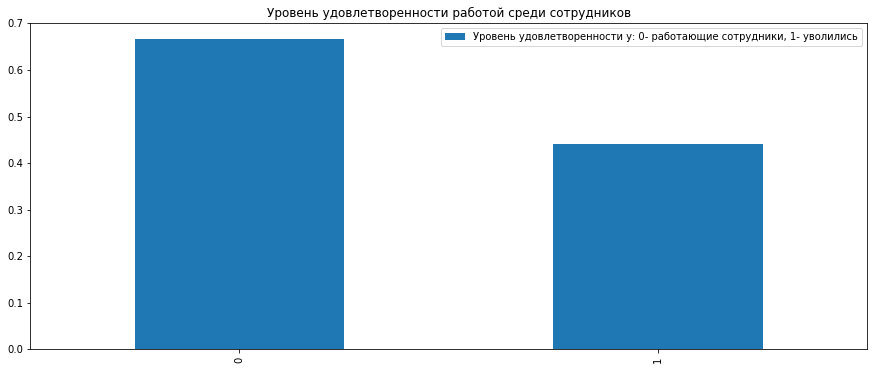

In [163]:
ff = hr_filt.groupby(['left']).agg({'satisfaction_level': 'mean', 'number_project': 'mean'}).reset_index()
ff.satisfaction_level.plot(kind='bar', 
                           title='Уровень удовлетворенности работой среди сотрудников').legend(
    ['Уровень удовлетворенности у: 0- работающие сотрудники, 1- уволились'])

Более интересная картина появляется, если посмотреть на среднеарифметическую долю среди сотрудников уволившихся и нет по параметру удовлетворенности работой: 66% - у работающих сотрудников и 44% - у сотрудников, которые уволились. Это говорит о том, что большая часть сотрудников, что уволилась, была недовольна своей работой.

По количеству проектов, выполненных за время работы данные практически равны. Незначительное превышение идет у сотрудников, уволившихся с работы, но она настолько незначительна, что мы можем не обращать внимания на эту разницу.

По данному пункту задания мы видим, что наиболее вероятная причина, почему сотрудник уволился - неудовлетворенность своей работой.

##### 9. Разделим данные на тестовую и обучающую выборки. Построим модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценим качество модели на тестовой выборке

In [44]:
data = hr[['satisfaction_level', 'last_evaluation', 
           'number_project', 'average_montly_hours', 
           'time_spend_company', 'Work_accident', 'promotion_last_5years']]
data_left = hr[['left']]   #выделим показатель left в отдельный df, он будет у нас для сравнения
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [139]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, data_left.values.ravel(), test_size=0.26)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis   # импортируем LDA-функционал
lda = LinearDiscriminantAnalysis()

In [140]:
lda.fit(x_train, y_train)  #учим нашу модель на 26% от общего числа

LinearDiscriminantAnalysis()

In [141]:
lda.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [142]:
#объединим df, чтобы сравнить результат модели с фактом
result = pd.DataFrame([y_test, lda.predict(x_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
3895,0,0
3896,0,0
3897,0,0
3898,1,1


Произведем расчет точности с помощью библиотеки sklearn и метода accuracy_score, для того, чтобы узнать долю правильных ответов нашей модели.

In [143]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(x_test))

0.7653846153846153

Расчет показал, что полученная модель с вероятностью 76,54%, на имеющихся данных, даст ответ уволится ли сотрудник в дальнейшем или нет. 

Не совсем идеальный результат, но процент довольно таки большой - 3/4 правильных прогнозов. Ее можно применять в опросах на выявление возможного решения увольнения сотрудника в будущем.

Посмотрим на коэффициенты дискриминантных линий, чтобы проверить, какие показатели более или менее влияют на нашу модель

In [156]:
lda.coef_

array([[-4.4753576 ,  0.65887194, -0.22897458,  0.00472995,  0.22456137,
        -1.10403761, -1.06442532]])

По коэффициентам дискриминантных линий мы видим, что наибольший вес, в определении нашей модели уволится сотрудник или нет, имеет первый показатель - satisfaction_level (уровень удовлетворенности работой). Слабо оказывают влияние: number_project, average_montly_hours, time_spend_company.